In [1]:
# import PyBEAM
import pybeam.precoded as pbp


In [3]:
# define model
model = pbp.fullDDM(drift = 'a')

phi = {'tnd' : 0.25, # mean non-decision time
    'sd_tnd' : 0.1, # standeard deviation in non-decision time
         'w' : 0.5, # mean relative start point
      'sd_w' : 0.75, # spread in relative start point
        'mu' : 1.0, # mean drift rate
     'sd_mu' : 1.5, # standard deviation in drift rate
         'b' : 0.75} # threshold

# generate and plot data
rt = pbp.simulate(N_sims = 1000, model = model, phi = phi)
fig = pbp.plot_rt(model = model, phi = phi, rt_max = 4.0, rt = rt);


RuntimeError: drift must equal 'constant', 'uniform', or 'normal'.

In [ ]:
p = {'p_tnd' : 'Uniform("tnd", lower = 0.0, upper = 1.0)',
  'p_sd_tnd' : 'Uniform("sd_tnd", lower = 0.001, upper = 0.25)',
       'p_w' : 'Uniform("w", lower = 0.25, upper = 0.75)',
    'p_sd_w' : 'Uniform("sd_w", lower = 0.01, upper = 0.99)',
      'p_mu' : 'Uniform("mu", lower = -5.0, upper = 5.0)', 
   'p_sd_mu' : 'Uniform("sd_mu", lower = 0.001, upper = 5.0)', 
       'p_b' : 'Uniform("b", lower = 0.1, upper = 2.5)'}

c0 = {'rt' : rt, 
     'tnd' : 'p_tnd',
  'sd_tnd' : 'p_sd_tnd',
       'w' : 'p_w',
    'sd_w' : 'p_sd_w',
      'mu' : 'p_mu',
   'sd_mu' : 'p_sd_mu',
       'b' : 'p_b'}

c = {0 : c0}

idata = pbp.inference(model = model,   
                     priors = p,       
                 conditions = c,       
                    samples = 25000,   
                     chains = 3,       
                      cores = 3,          
                  file_name = 'DDM')


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [b, sd_mu, mu, sd_w, w, sd_tnd, tnd]


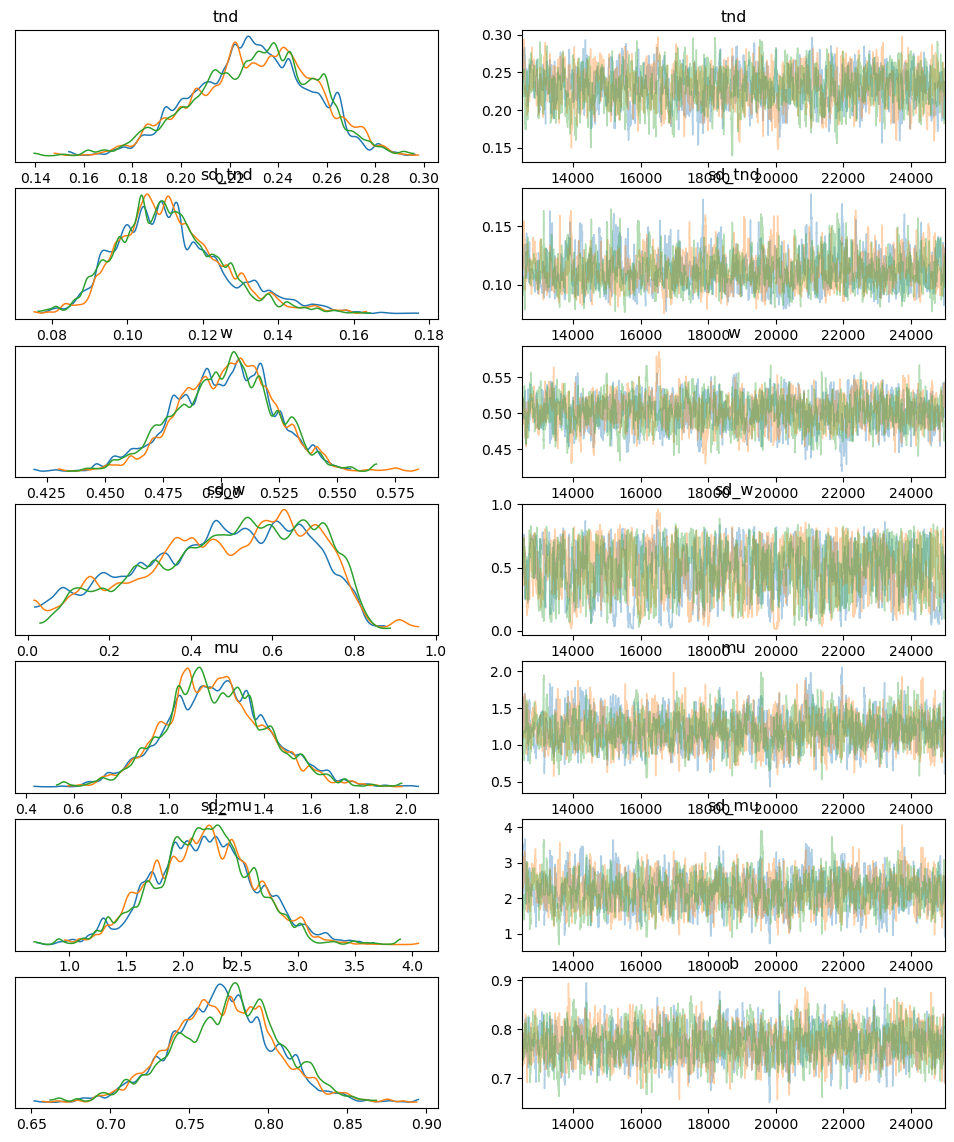

In [4]:
pbp.plot_idata(file_name = 'DDM', burnin = 12500);


In [5]:
pbp.summary(file_name = 'DDM', burnin = 12500)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tnd,0.230,0.024,0.185,0.273,0.001,0.001,846.0,1274.0,1.0
sd_tnd,0.112,0.014,0.087,0.139,0.001,0.000,740.0,1440.0,1.0
w,0.502,0.021,0.465,0.543,0.001,0.000,946.0,1385.0,1.0
sd_w,0.483,0.199,0.118,0.805,0.008,0.006,620.0,617.0,1.0
mu,1.201,0.214,0.814,1.620,0.007,0.005,858.0,1300.0,1.0
sd_mu,2.182,0.446,1.386,3.053,0.015,0.011,883.0,1248.0,1.0
b,0.772,0.033,0.708,0.831,0.001,0.001,1028.0,1495.0,1.0
